Partition A: [0], Partition B: [1]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partition A: [0], Partition B: [1, 2]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partition A: [0], Partition B: [1, 2, 3]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partition A: [0], Partition B: [1, 2, 3, 4]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partition A: [0], Partition B: [1, 2, 3, 4, 5]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partition A: [0], Partition B: [1, 2, 3, 4, 5, 6]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partition A: [0], Partition B: [1, 2, 3, 4, 5, 6, 7]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partition A: [0, 1], Partition B: [2]
Entanglement Entropy S_A: -1.4426369540323816e-10, S_B: -1.4426369540323816e-10

Partit

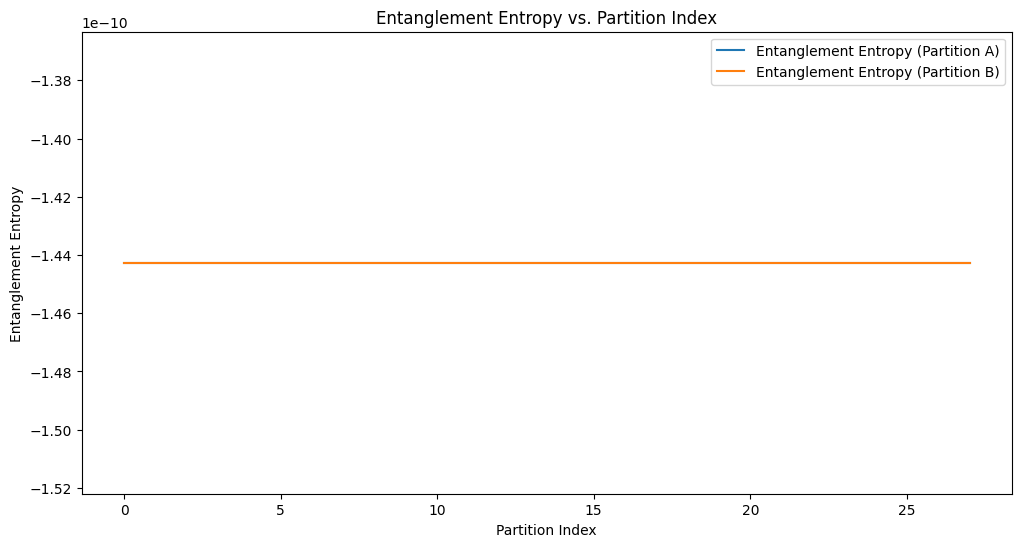

In [80]:
import numpy as np

# Parameters of the system
L = 8  # Length of the chain

d = 2  # Degrees of freedom on each lattice site
psi = np.random.rand(d**L)
psi /= np.linalg.norm(psi)  # Normalize the wavefunction

# Initialize arrays to store entanglement entropy
entanglement_entropy_A = []
entanglement_entropy_B = []

# Calculate the entanglement entropy of different bipartitions
for i in range(1, L):
    for j in range(i, L):
        # Choose the bipartition
        subsystem_A_indices = list(range(i))       # index of qubits in subsystem A
        subsystem_B_indices = list(range(i, j+1))  # index of qubits in subsystem B

        # 从波函数中提取子系统A的部分
        psi_A = psi.reshape([d]*L)  # 将波函数变形为张量
        psi_A = np.einsum('abcdefghijk'[:L], psi_A, optimize=True)

        # reduced density matrix A
        rho_A = np.outer(psi_A, psi_A.conj())

        # 计算子系统A的纠缠熵
        eigenvalues = np.linalg.eigvalsh(rho_A)
        S_A = -np.sum(eigenvalues * np.log2(eigenvalues + 1e-10))
        entanglement_entropy_A.append(S_A)

        # 计算子系统B的密度矩阵
        rho_B = np.outer(psi_A, psi_A.conj())

        # 计算子系统B的纠缠熵
        eigenvalues = np.linalg.eigvalsh(rho_B)
        S_B = -np.sum(eigenvalues * np.log2(eigenvalues + 1e-10))
        entanglement_entropy_B.append(S_B)

        # 打印结果
        print(f"Partition A: {subsystem_A_indices}, Partition B: {subsystem_B_indices}")
        print(f"Entanglement Entropy S_A: {S_A}, S_B: {S_B}")
        print()

# 绘制纠缠熵的图表
plt.figure(figsize=(12, 6))
plt.plot(range(len(entanglement_entropy_A)), entanglement_entropy_A, label='Entanglement Entropy (Partition A)')
plt.plot(range(len(entanglement_entropy_B)), entanglement_entropy_B, label='Entanglement Entropy (Partition B)')
plt.xlabel('Partition Index')
plt.ylabel('Entanglement Entropy')
plt.legend()
plt.title('Entanglement Entropy vs. Partition Index')
plt.show()


